# Entrenando una Red Feed-Forward con Keras (MNIST)

In [1]:
# ============================================================
# 📌 Celda 1: Importación de librerías necesarias
# ============================================================

# TensorFlow y Keras para definir y entrenar la red neuronal
from tensorflow import keras
import tensorflow as tf

# NumPy para manipulación numérica y de matrices
import numpy as np

# Matplotlib para visualizar datos y resultados
import matplotlib.pyplot as plt


Keras (incluido en TensorFlow) nos permite definir redes neuronales de manera sencilla.

NumPy manipula los tensores de entrada y salida.

Matplotlib sirve para mostrar los resultados del entrenamiento.

In [2]:
# ============================================================
# 📌 Celda 2: Configuración de semillas aleatorias
# ============================================================

np.random.seed(30)
tf.random.set_seed(30)


Las semillas aseguran reproducibilidad: cada vez que ejecutes el notebook, obtendrás los mismos resultados.

In [3]:
# ============================================================
# 📌 Celda 3: Cargar el conjunto de datos MNIST
# ============================================================

# Cargamos imágenes (imgs) y etiquetas (labs)
(imgs, labs), _ = keras.datasets.mnist.load_data()

print("Forma de las imágenes:", imgs.shape)
print("Forma de las etiquetas:", labs.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Forma de las imágenes: (60000, 28, 28)
Forma de las etiquetas: (60000,)


MNIST contiene 60.000 imágenes de dígitos manuscritos (0-9), de tamaño 28×28 píxeles.

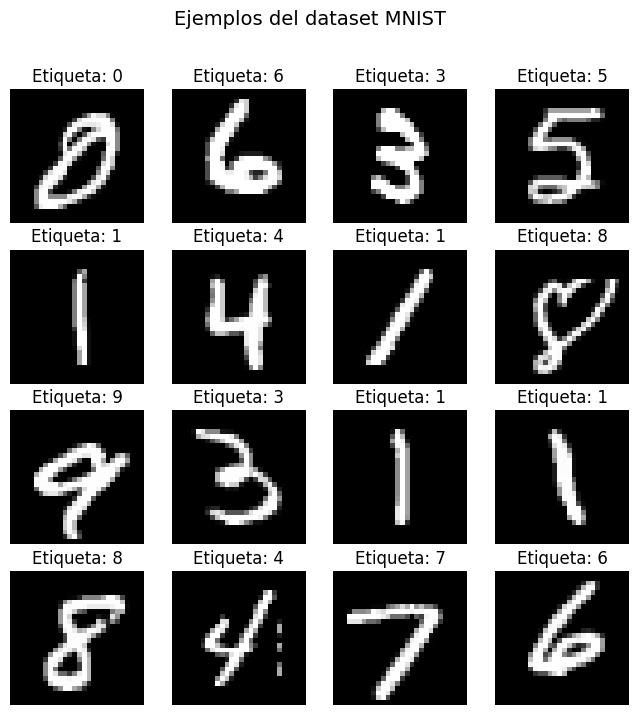

In [4]:
# ============================================================
# 📌 Celda 4: Mostrar una grilla de ejemplos al azar
# ============================================================

h, w = 4, 4  # grilla de 4x4 imágenes
fig, axs = plt.subplots(h, w, figsize=(2*h, 2*w))

for i in range(h):
    for j in range(w):
        ex = np.random.randint(len(imgs))
        axs[i, j].imshow(imgs[ex], cmap='gray')
        axs[i, j].set_title(f"Etiqueta: {labs[ex]}")
        axs[i, j].axis('off')

plt.suptitle("Ejemplos del dataset MNIST", fontsize=14)
plt.show()


In [5]:
# ============================================================
# 📌 Celda 5: Transformación y normalización de los datos
# ============================================================

# Convertimos cada imagen 28x28 en un vector de 784 componentes
X = imgs.reshape(60000, 28*28).astype('float32')

# Normalizamos los valores de píxeles entre 0 y 1
X = X / 255.0
print("Forma de X:", X.shape)

# Convertimos las etiquetas numéricas en codificación one-hot
Y = keras.utils.to_categorical(labs, 10)
print("Forma de Y:", Y.shape)


Forma de X: (60000, 784)
Forma de Y: (60000, 10)


Cada imagen se aplana (flatten) para ingresar al modelo.

La normalización acelera el entrenamiento.

One-hot convierte etiquetas como “3” en [0,0,0,1,0,0,0,0,0,0].

In [6]:
# ============================================================
# 📌 Celda 6: Definir la arquitectura de la red Feed-Forward
# ============================================================

h1 = 64   # neuronas de la primera capa oculta
h2 = 32   # neuronas de la segunda capa oculta

red = keras.Sequential(name="Red_Feed_Forward_MNIST")

# Capa 1: entrada + activación ReLU
red.add(keras.layers.Dense(h1, input_dim=784, activation='relu', name='Capa_Oculta_1'))

# Capa 2: segunda capa oculta
red.add(keras.layers.Dense(h2, activation='relu', name='Capa_Oculta_2'))

# Capa 3: salida con activación softmax (para clasificación multiclase)
red.add(keras.layers.Dense(10, activation='softmax', name='Capa_Salida'))

# Resumen del modelo
red.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "Red_Feed_Forward_MNIST"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Capa_Oculta_1 (Dense)           │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_Oculta_2 (Dense)           │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_Salida (Dense)             │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,650 (205.66 KB)

 Trainable params: 52,650 (205.66 KB)

 Non-trainable params: 0 (0.00 B)

Las funciones ReLU ayudan a aprender relaciones no lineales.

La softmax convierte la salida en probabilidades para cada dígito (0-9).

In [7]:
# ============================================================
# 📌 Celda 7: Compilar la red
# ============================================================

red.compile(
    loss='categorical_crossentropy',  # función de pérdida para clasificación
    optimizer='sgd',                  # descenso de gradiente estocástico
    metrics=['accuracy']              # métrica para evaluar desempeño
)


“categorical_crossentropy” mide qué tan lejos está la predicción de la etiqueta real.

“sgd” (Stochastic Gradient Descent) actualiza los pesos en cada batch.

In [8]:
# ============================================================
# 📌 Celda 8: Entrenamiento de la red
# ============================================================

hist = red.fit(
    X, Y,

    epochs=5,         # número de iteraciones completas
    batch_size=1,     # tamaño de lote
    verbose=1
)


Epoch 1/5
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 114s 2ms/step - accuracy: 0.8787 - loss: 0.3843
Epoch 2/5
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 141s 2ms/step - accuracy: 0.9577 - loss: 0.1361
Epoch 3/5
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 111s 2ms/step - accuracy: 0.9690 - loss: 0.1042
Epoch 4/5
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 112s 2ms/step - accuracy: 0.9746 - loss: 0.0828
Epoch 5/5
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 111s 2ms/step - accuracy: 0.9782 - loss: 0.0746


En cada epoch, la red ve todos los ejemplos una vez.

Cada batch ajusta los pesos según el error obtenido.

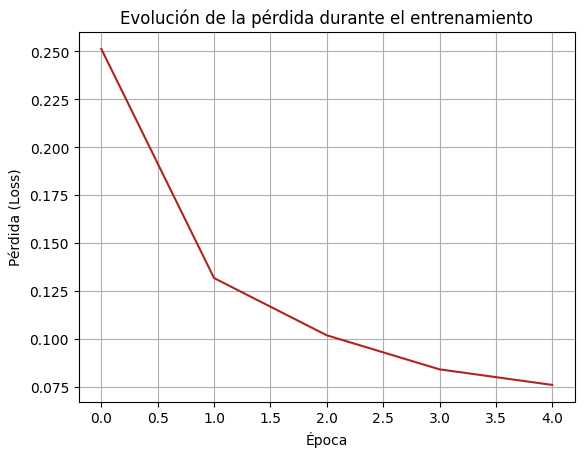

In [9]:
# ============================================================
# 📊 Celda 9: Visualizar la pérdida
# ============================================================

plt.plot(hist.history['loss'], color='firebrick')
plt.title('Evolución de la pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida (Loss)')
plt.grid(True)
plt.show()


La pérdida debe disminuir progresivamente, lo que indica que la red está aprendiendo.

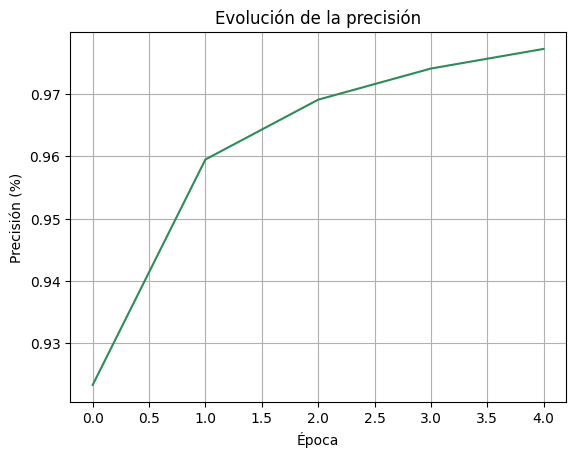

In [10]:
# ============================================================
# 📊 Celda 10: Visualizar la precisión
# ============================================================

plt.plot(hist.history['accuracy'], color='seagreen')
plt.title('Evolución de la precisión')
plt.xlabel('Época')
plt.ylabel('Precisión (%)')
plt.grid(True)
plt.show()


Permite visualizar cómo mejora el rendimiento del modelo a lo largo del entrenamiento.

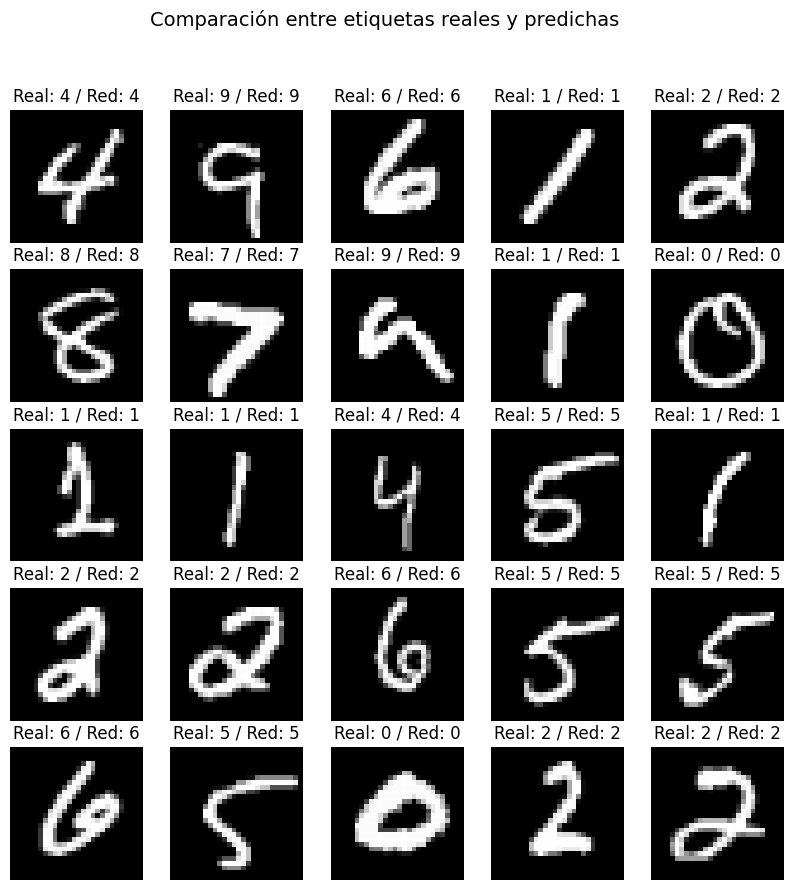

In [11]:
# ============================================================
# 📌 Celda 11: Evaluar algunas predicciones
# ============================================================

h, w = 5, 5
fig, axs = plt.subplots(h, w, figsize=(2*h, 2*w))

for i in range(h):
    for j in range(w):
        ex = np.random.randint(len(imgs))
        Xin = X[ex].reshape(1, 28*28)
        Ypred = red.predict(Xin, verbose=0).reshape(10)
        lpred = np.argmax(Ypred)

        axs[i, j].imshow(imgs[ex], cmap='gray')
        axs[i, j].set_title(f"Real: {labs[ex]} / Red: {lpred}")
        axs[i, j].axis('off')

plt.suptitle("Comparación entre etiquetas reales y predichas", fontsize=14)
plt.show()


In [ ]:
## 🧩 Conclusiones

# - La red Feed-Forward logra aprender los patrones visuales de los dígitos MNIST.
# - La arquitectura con dos capas ocultas (64 y 32 neuronas) es suficiente para obtener buenos resultados.
# - Las funciones de activación ReLU y Softmax son adecuadas para este tipo de clasificación.
# - La pérdida disminuye y la precisión aumenta con las épocas, reflejando aprendizaje efectivo.



# Entrenando una Red Feed-Forward con CIFAR-10 (Imágenes a color)

In [12]:
# ============================================================
# 📌 Celda 1: Cargar el conjunto de datos CIFAR-10
# ============================================================

# CIFAR-10 contiene 60.000 imágenes a color (32x32x3) en 10 clases
# Cada clase representa un tipo de objeto (avión, coche, pájaro, gato, etc.)

(imgs, labs), _ = keras.datasets.cifar10.load_data()

print("Forma de las imágenes:", imgs.shape)
print("Forma de las etiquetas:", labs.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step
Forma de las imágenes: (50000, 32, 32, 3)
Forma de las etiquetas: (50000, 1)


CIFAR-10 es más complejo que MNIST: cada imagen tiene 3 canales (RGB) y más variabilidad visual.

/tmp/ipython-input-3760738223.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  axs[i, j].set_title(class_names[int(labs[ex])], fontsize=9)


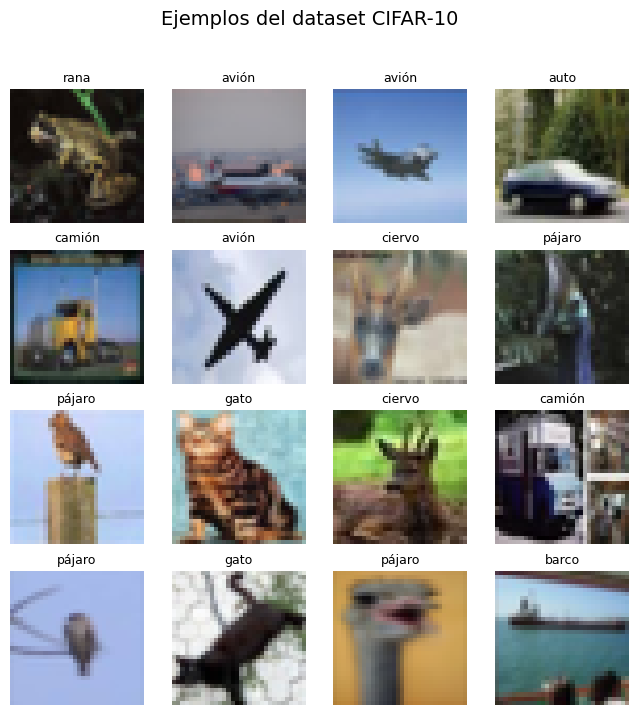

In [13]:
# ============================================================
# 📌 Celda 2: Mostrar algunas imágenes del dataset CIFAR-10
# ============================================================

# Nombres de las 10 clases para interpretación humana
class_names = [
    'avión', 'auto', 'pájaro', 'gato', 'ciervo',
    'perro', 'rana', 'caballo', 'barco', 'camión'
]

h, w = 4, 4
fig, axs = plt.subplots(h, w, figsize=(2*h, 2*w))

for i in range(h):
    for j in range(w):
        ex = np.random.randint(len(imgs))
        axs[i, j].imshow(imgs[ex])
        axs[i, j].set_title(class_names[int(labs[ex])], fontsize=9)
        axs[i, j].axis('off')

plt.suptitle("Ejemplos del dataset CIFAR-10", fontsize=14)
plt.show()


Visualizar ejemplos permite dimensionar la complejidad visual respecto a MNIST: colores, fondos y formas distintas.

In [14]:
# ============================================================
# 📌 Celda 3: Transformar y normalizar las imágenes
# ============================================================

# Aplanamos las imágenes 32x32x3 a vectores de 3072 elementos
X = imgs.reshape(imgs.shape[0], -1).astype('float32')

# Normalizamos al rango [0, 1]
X = X / 255.0

# Codificamos las etiquetas en one-hot (10 clases)
Y = keras.utils.to_categorical(labs, 10)

print("Forma de X:", X.shape)
print("Forma de Y:", Y.shape)


Forma de X: (50000, 3072)
Forma de Y: (50000, 10)


Cada imagen se convierte en un vector plano de 3 072 números (32 × 32 × 3).
Así la red Feed-Forward puede recibir los datos como entradas simples.

In [15]:
# ============================================================
# 📌 Celda 4: Definir la red Feed-Forward para CIFAR-10
# ============================================================

h1 = 256   # Capa oculta 1
h2 = 128   # Capa oculta 2

red_cifar = keras.Sequential(name="Red_Feed_Forward_CIFAR10")

# Capa de entrada
red_cifar.add(keras.layers.Dense(h1, input_dim=32*32*3, activation='relu', name='Capa_Oculta_1'))

# Capa oculta intermedia
red_cifar.add(keras.layers.Dense(h2, activation='relu', name='Capa_Oculta_2'))

# Capa de salida (10 clases)
red_cifar.add(keras.layers.Dense(10, activation='softmax', name='Capa_Salida'))

red_cifar.summary()


Model: "Red_Feed_Forward_CIFAR10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Capa_Oculta_1 (Dense)           │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_Oculta_2 (Dense)           │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_Salida (Dense)             │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 820,874 (3.13 MB)

 Trainable params: 820,874 (3.13 MB)

 Non-trainable params: 0 (0.00 B)

La red tiene dos capas ocultas densas, suficientes para captar relaciones simples, aunque no tan potentes como una CNN.

In [16]:
# ============================================================
# 📌 Celda 5: Compilación
# ============================================================

red_cifar.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',        # podrías cambiar a 'adam' para convergencia más rápida
    metrics=['accuracy']
)


La configuración es igual a la usada en MNIST.
La pérdida mide la diferencia entre etiquetas y predicciones.

In [17]:
# ============================================================
# 📌 Celda 6: Entrenamiento del modelo
# ============================================================

hist_cifar = red_cifar.fit(
    X, Y,
    epochs=10,          # más épocas por la complejidad del dataset
    batch_size=32,      # tamaño de lote más razonable para imágenes
    verbose=1
)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.2845 - loss: 1.9833
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.3964 - loss: 1.7073
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4278 - loss: 1.6212
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4469 - loss: 1.5648
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4621 - loss: 1.5187
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4759 - loss: 1.4802
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4888 - loss: 1.4457
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4996 - loss: 1.4143
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5109 - loss: 1.3862
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5200 - loss: 1.3592


Con CIFAR-10 la red requiere más épocas y batches más grandes para estabilizar el entrenamiento.

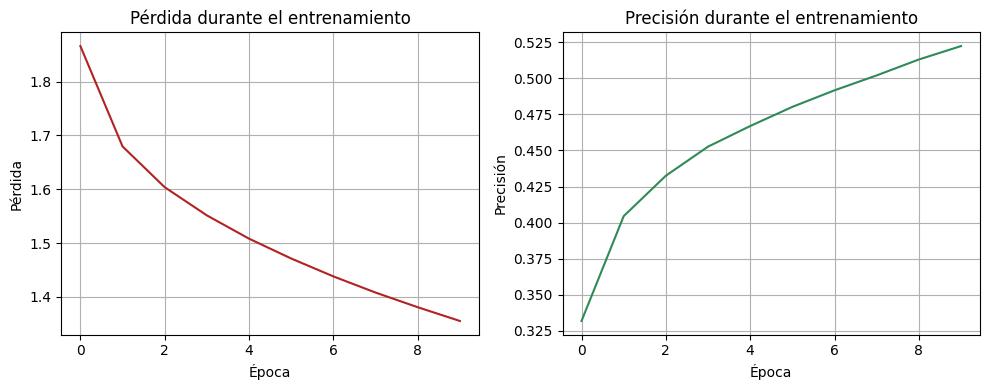

In [18]:
# ============================================================
# 📊 Celda 7: Gráficas de pérdida y precisión
# ============================================================

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(hist_cifar.history['loss'], color='firebrick')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época'); plt.ylabel('Pérdida'); plt.grid(True)

plt.subplot(1,2,2)
plt.plot(hist_cifar.history['accuracy'], color='seagreen')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época'); plt.ylabel('Precisión'); plt.grid(True)

plt.tight_layout()
plt.show()


Las curvas permiten visualizar el progreso del aprendizaje.
En CIFAR-10, la precisión inicial suele ser baja (< 40 %) en modelos densos sin convoluciones.

/tmp/ipython-input-3753350897.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  axs[i, j].set_title(f"Real: {class_names[int(labs[ex])]} \nPred: {class_names[lpred]}", fontsize=8)


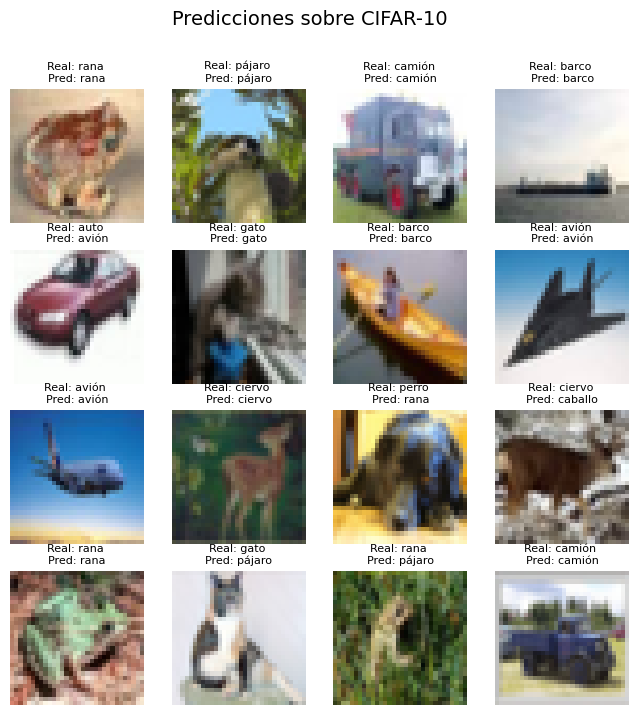

In [19]:
# ============================================================
# 📌 Celda 8: Verificar algunas predicciones
# ============================================================

h, w = 4, 4
fig, axs = plt.subplots(h, w, figsize=(2*h, 2*w))

for i in range(h):
    for j in range(w):
        ex = np.random.randint(len(imgs))
        Xin = X[ex].reshape(1, 32*32*3)
        Ypred = red_cifar.predict(Xin, verbose=0).reshape(10)
        lpred = np.argmax(Ypred)

        axs[i, j].imshow(imgs[ex])
        axs[i, j].set_title(f"Real: {class_names[int(labs[ex])]} \nPred: {class_names[lpred]}", fontsize=8)
        axs[i, j].axis('off')

plt.suptitle("Predicciones sobre CIFAR-10", fontsize=14)
plt.show()


Aunque el modelo puede confundirse en imágenes complejas, este ejercicio muestra el proceso de inferencia paso a paso.

In [ ]:
## 🧩 Conclusiones CIFAR-10

# - Este ejemplo muestra cómo una red **Feed-Forward** puede aplicarse a imágenes a color.
# - A pesar de su simplicidad, la red aprende patrones básicos.
# - Sin embargo, el rendimiento suele ser limitado frente a redes **convolucionales (CNN)**, que aprovechan mejor la estructura espacial de las imágenes.
# - Sirve para introducir:
#  - El concepto de *entrada aplanada (flatten)*.
#  - El crecimiento del número de parámetros con imágenes RGB.
